In [1]:
from pylab import *
from scipy.special import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 120

### 2)

In [2]:
# Code from GitHub.
def fdcoeffV(k,xbar,x):
    x = array(x)  # in case a list or tuple passed in, convert to numpy array
    n = len(x)
    if k >=n:
        raise ValueError('*** len(x) must be larger than k')
        
    A = ones((n,n))
    xrow = x - xbar  # displacement vector
    
    for i in range(1,n):
        A[i,:] = (xrow**i) / factorial(i)
    
    condA = cond(A)  # condition number
    if condA > 1e8:
        print("Warning: condition number of Vandermonde matrix is approximately %.1e" % condA)
        
    b = zeros(x.shape)
    b[k] = 1.
    
    c = solve(A,b)
    
    return c

def fdstencil(k, jbar, stencil_points):
    """
    Compute and print the finite difference stencil for an order k derivative
    using at least k+1 equally spaced points.
    The stencil_points are thus assumed to be integers (indices of stencil points)
    as is jbar, the index at which the approximation is to be used.
    
    For example, the standard second order stencil for u''(x_0) 
    can be printed via
        fdstencil(2, 0, [-1,0,1])
    """
    assert type(jbar) is int, '*** jbar should be an integer'
    stencil_pts = array(stencil_points)
    assert stencil_pts.dtype == int, '*** stencil_points should be integers'
    
    c = fdcoeffV(k, jbar, stencil_pts)
    
    print("Stencil for approximation to order %s derivative at U_{%s} is:" \
          % (str(k), str(jbar)))
    coeffs = ['%s / h^2' % str(cj) for cj in c]
    s = '[' 
    for j in range(len(c)):
        subj = str(stencil_pts[j])
        cj = c[j]
        sj = '%g U_{%s}' % (abs(cj), stencil_pts[j])
        if cj >= 0:
            s = s + ' + ' + sj
        else:
            s = s + ' - ' + sj
    s = s + '] / h^%i' % k
    print(s)
    return c

In [1]:
const = fdstencil(4, 0, [-2, -1, 0, 1, 2])

NameError: name 'fdstencil' is not defined

In [4]:
Vand = np.array([[   1,    1, 1,    1,   1],
                 [  -2,   -1, 0,    1,   2],
                 [   2,  1/2, 0,  1/2,   2],
                 [-4/3, -1/6, 0,  1/6, 4/3],
                 [ 2/3, 1/24, 0, 1/24, 2/3]])
np.allclose(Vand @ const, [0, 0, 1, 0, 0])

True

### 3)

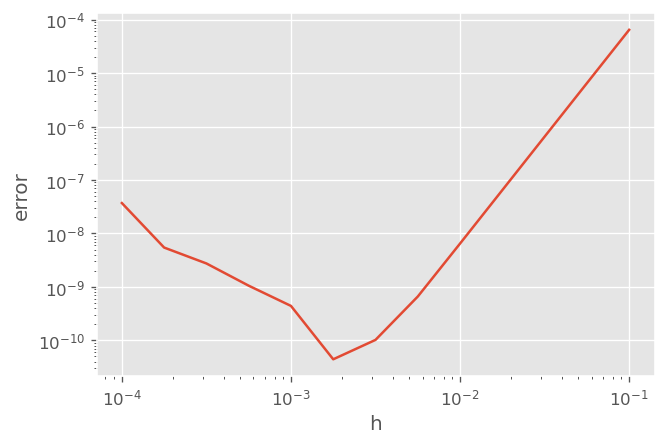

,error,prediction
h,,
0.100000,6.443065e-05,1.000000e-04
0.056234,6.458817e-06,1.000000e-05
0.031623,6.463807e-07,1.000000e-06
0.017783,6.465517e-08,1.000000e-07
0.010000,6.467880e-09,1.000000e-08
0.005623,6.599135e-10,1.000000e-09
0.003162,1.019997e-10,1.000000e-10
0.001778,4.420064e-11,1.000000e-11
0.001000,4.406173e-10,1.000000e-12


In [6]:
#initialize
hvals = logspace(-1, -4, 13)
u = lambda x: np.sin(2*x)
x_bar = 1
tru = -4*np.sin(2*x_bar)
errors = []

#approximate
for h in hvals:
    apprx = (const[0] * u(x_bar - 2*h)
             + const[1] * u(x_bar - h)
             + const[2] * u(x_bar)
             + const[3] * u(x_bar + h)
             + const[4] * u(x_bar + 2*h)) / h**2
    errors.append(apprx - tru)

#predicted error from fdstencil
pred = hvals**4

#plot
plt.loglog(hvals, np.abs(errors))
plt.xlabel('h')
plt.ylabel('error')
plt.show()

#table
df = pd.DataFrame({'h':hvals,
                   'error':errors,
                   'prediction':pred})
df.set_index('h', inplace=True)
df